In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-poster')

In [4]:
cells = [50, 75, 100, 125, 150, 175, 200]
ncells = len(cells)

peaks = [100, 250, 500, 1000, 2500]
npeaks = len(peaks)

init_test = 2

nsims_per_condition = 1

nsims = 25

a = np.ones(nsims) #1. * np.ones((1,1))
b = np.ones(nsims) #1. * np.ones((1,1))
mu = np.ones(nsims) #1. * np.ones((1,))
ajj = np.ones(nsims)
bjj = np.ones(nsims)
epsilon = 60.

In [5]:
learned_a = np.zeros((nsims, ncells, npeaks, init_test))
learned_b = np.zeros((nsims, ncells, npeaks, init_test))
learned_mu = np.zeros((nsims, ncells, npeaks, init_test))
learned_ajj = np.zeros((nsims, ncells, npeaks, init_test))
learned_bjj = np.zeros((nsims, ncells, npeaks, init_test))

In [6]:
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz')
    learned_a[i] = dat['a'][:,:,0,:,0,0]
    learned_b[i] = dat['b'][:,:,0,:,0,0]
    learned_mu[i] = dat['mu'][:,:,0,:,0]
    learned_ajj[i] = dat['ajj'][:,:,0,:,0]
    learned_bjj[i] = dat['bjj'][:,:,0,:,0]
    
    a[i] = dat['true_a']
    b[i] = dat['true_b']
    mu[i] = dat['true_mu']
    ajj[i] = dat['true_ajj']
    bjj[i] = dat['true_bjj']

In [7]:
mask = a < 1
print(np.sum(mask))

25


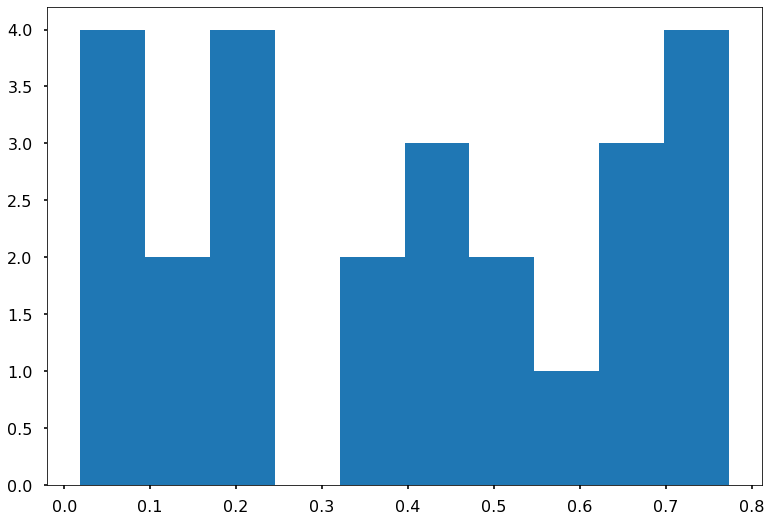

In [8]:
plt.hist(a)
plt.show()

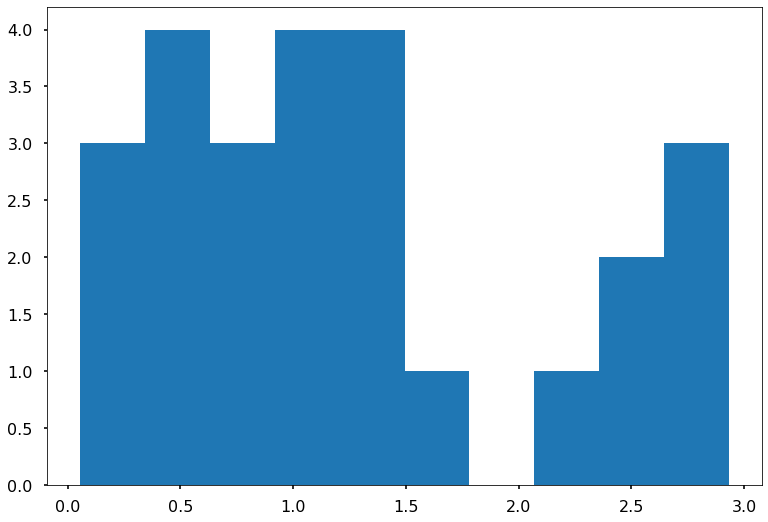

In [9]:
plt.hist(mu)
plt.show()

(array([2., 1., 5., 0., 4., 2., 1., 2., 6., 2.]),
 array([0.01057073, 0.50944744, 1.00832414, 1.50720085, 2.00607755,
        2.50495426, 3.00383097, 3.50270767, 4.00158438, 4.50046108,
        4.99933779]),
 <BarContainer object of 10 artists>)

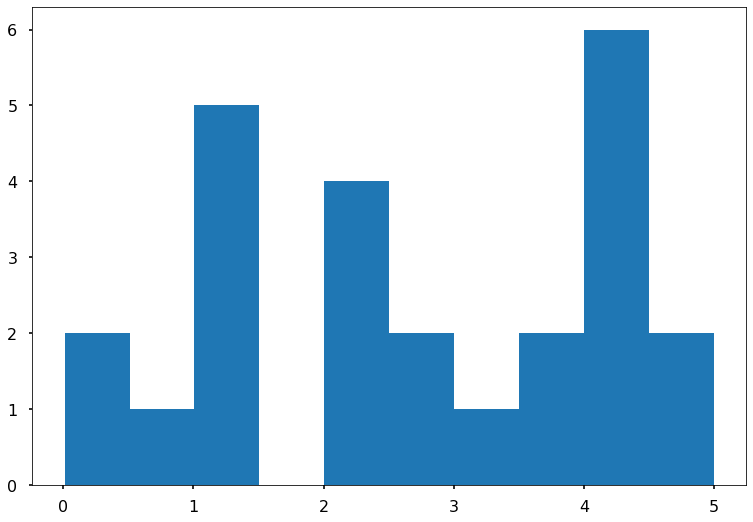

In [10]:
plt.hist(b)

In [11]:
a_err = learned_a - np.expand_dims(a, (1,2,3))
b_err = learned_b - np.expand_dims(b, (1,2,3))
mu_err = learned_mu - np.expand_dims(mu, (1,2,3))

In [12]:
learned_ajj.shape

(25, 7, 5, 2)

In [13]:
ajj_err = np.multiply(learned_ajj, learned_a) - np.expand_dims(np.multiply(ajj,a), (1,2,3))
bjj_err = np.multiply(learned_bjj, learned_b) - np.expand_dims(np.multiply(bjj,b), (1,2,3))

In [14]:
print(np.nanmean(np.square(a_err[mask,:,:,0])))
print(np.nanmean(np.square(a_err[mask,:,:,1])))

0.18071207945140688
0.18071207945140688


In [15]:
print(np.nanmean(np.square(b_err[mask,:,:,0])))
print(np.nanmean(np.square(b_err[mask,:,:,1])))

1.1881398863752044
1.1881398863752044


In [16]:
print(np.nanmean(np.square(mu_err[:,:,:,0])))
print(np.nanmean(np.square(mu_err[:,:,:,1])))

2.2611123972479836
2.2611123972479836


In [17]:
print(np.nanmean(np.square(ajj_err[mask,:,:,0])))
print(np.nanmean(np.square(ajj_err[mask,:,:,1])))

0.4302241297173958
0.4302241297173958


In [18]:
print(np.nanmean(np.square(bjj_err[mask,:,:,0])))
print(np.nanmean(np.square(bjj_err[mask,:,:,1])))

2.5719930998592893
2.5719930998592893


In [19]:
# np.mean(np.abs(100 * np.divide(a_err[:,:,:,0], np.reshape(a, (50,1,1)))))

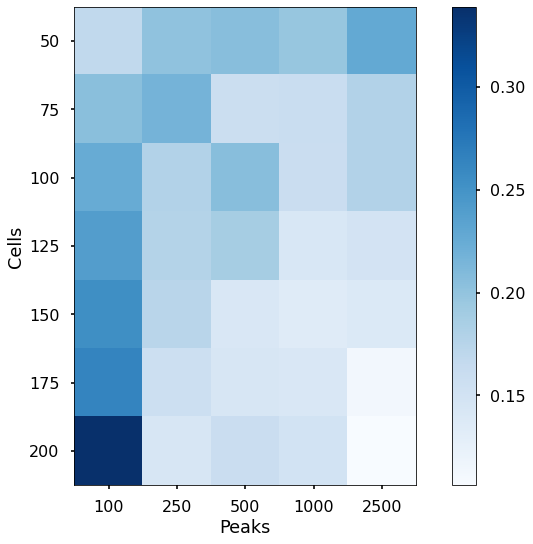

In [20]:
mu0 = np.nanmean(np.square(a_err[:,:,:,1]), axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-a.pdf')
#plt.show()

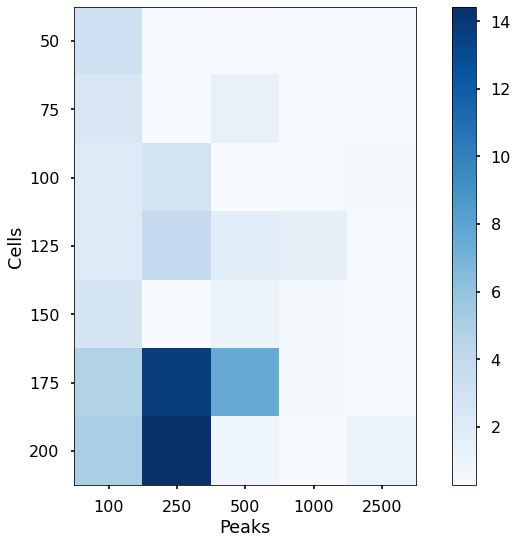

In [21]:
mu0 = np.nanmean(np.square(mu_err[:,:,:,1]), axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-mu.pdf')
#plt.show()

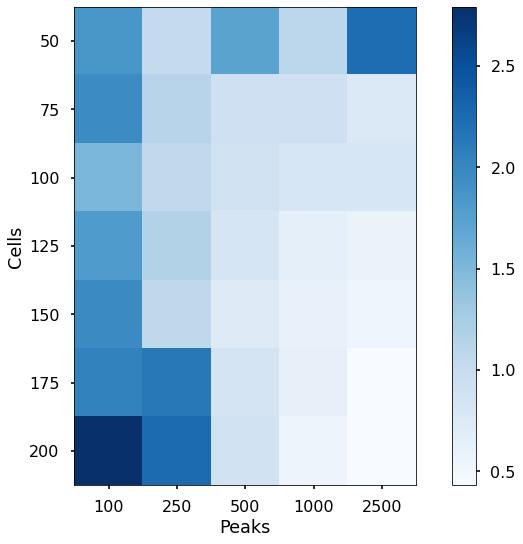

In [22]:
mu0 = np.nanmean(np.square(b_err[mask,:,:,1]), axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-b.pdf')
#plt.show()

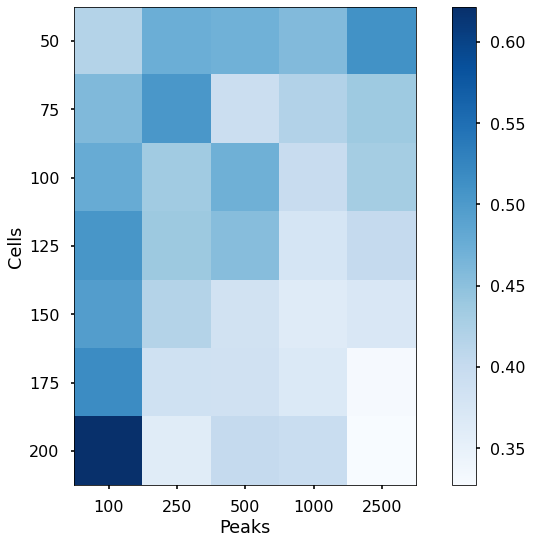

In [23]:
mu0 = np.nanmean(np.square(ajj_err[mask,:,:,1]), axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-ajj.pdf')
#plt.show()

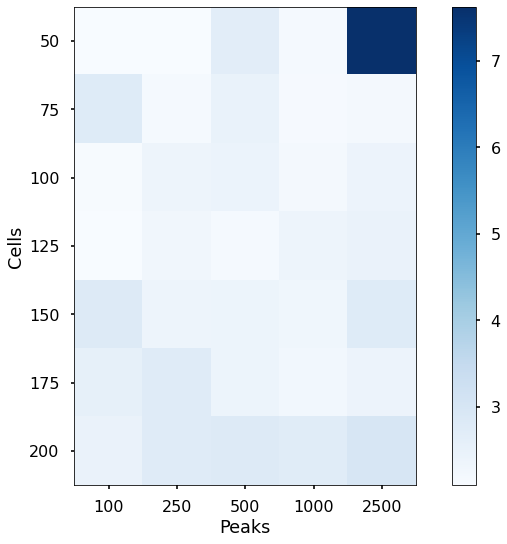

In [24]:
mu0 = np.nanmean(np.square(bjj_err[mask,:,:,1]), axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-bjj.pdf')
#plt.show()

In [25]:
# plt.scatter(a, mu)
# plt.show()

In [26]:
# mu0 = dat['b'][:,:,0,1,0,0]
# fig, ax = plt.subplots()
# im = ax.imshow(np.square(1 - mu0))
# ax.set_xticks(np.arange(mu0.shape[1]))
# ax.set_yticks(np.arange(mu0.shape[0]))
# ax.set_xticklabels(peaks)
# ax.set_yticklabels(cells)
# ax.set_xlabel('Peaks')
# ax.set_ylabel('Cells')
# cbar = ax.figure.colorbar(im, ax = ax)
# plt.show()
# print(np.mean(np.square(1 - mu0)))

In [27]:
# thenans = np.unique(np.where(np.isnan(a_err))[0])

In [28]:
# plt.scatter(a[thenans], mu[thenans])
# plt.show()

In [29]:
c = ['k','b','r','g','y','c','m']

In [30]:
cells

[50, 75, 100, 125, 150, 175, 200]

In [31]:
peaks

[100, 250, 500, 1000, 2500]

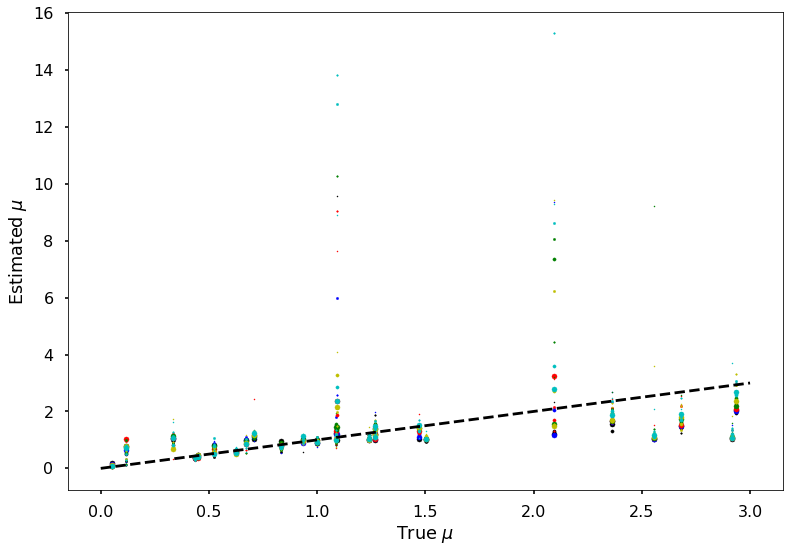

In [32]:
for i in range(6):
    for j in range(5):
        if j == 4:
            plt.scatter(mu[mask], learned_mu[mask,i,j,1], s = np.array(peaks[j]/100.), label = cells[i], c = c[i])
        else:
            plt.scatter(mu[mask], learned_mu[mask,i,j,1], s = np.array(peaks[j]/100.), c = c[i])
plt.plot([0,3],[0,3], 'k--')
#plt.xlim([0,3])
#plt.ylim([0,3.5])
plt.xlabel('True $\mu$')
plt.ylabel('Estimated $\mu$')
#plt.legend()
#plt.savefig('frontier-mu-line.pdf')
plt.show()

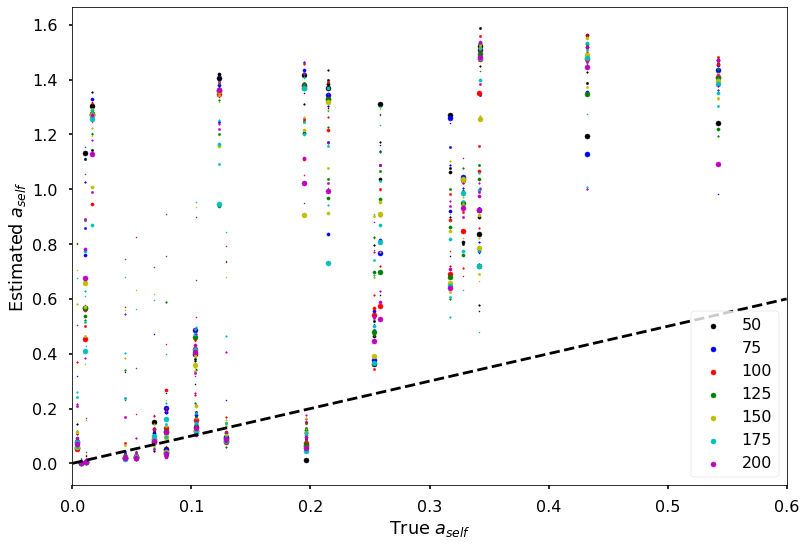

In [33]:
for i in range(7):
    for j in range(5):
        if j == 4:
            plt.scatter(np.multiply(ajj, a)[mask], 
                        np.multiply(learned_ajj[:,i,j,1], learned_a[:,i,j,1])[mask],
                        s = np.array(peaks[j]/100.), label = cells[i], c = c[i])
        else:
            plt.scatter(np.multiply(ajj, a)[mask], 
                        np.multiply(learned_ajj[:,i,j,1], learned_a[:,i,j,1])[mask],
                        s = np.array(peaks[j]/100.), c = c[i])
plt.plot([0,0.6],[0,.6], 'k--')
plt.xlim([0,0.6])
#plt.ylim([0,2.5])
plt.xlabel('True $a_{self}$')
plt.ylabel('Estimated $a_{self}$')
plt.legend()
plt.savefig('frontier-ajj-line.pdf')
#plt.show()

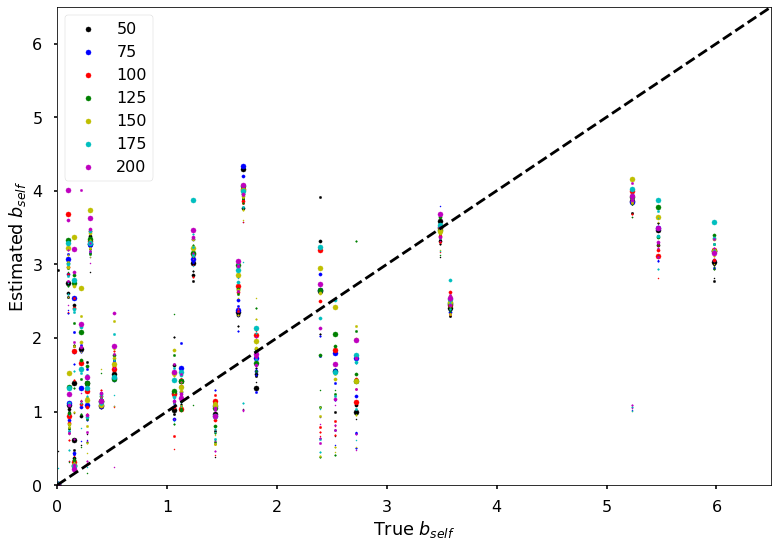

In [34]:
for i in range(7):
    for j in range(5):
        if j == 4:
            plt.scatter(np.multiply(bjj,b), np.multiply(learned_bjj[:,i,j,1], learned_b[:,i,j,1]),
                        s = np.array(peaks[j]/100.), label = cells[i], c = c[i])
        else:
            plt.scatter(np.multiply(bjj,b), np.multiply(learned_bjj[:,i,j,1], learned_b[:,i,j,1]), 
                        s = np.array(peaks[j]/100.), c = c[i])
plt.plot([0,6.5],[0,6.5], 'k--')
plt.xlabel('True $b_{self}$')
plt.ylabel('Estimated $b_{self}$')
plt.xlim([0,6.5])
plt.ylim([0,6.5])
plt.legend()
plt.savefig('frontier-bjj-line.pdf')
#plt.show()

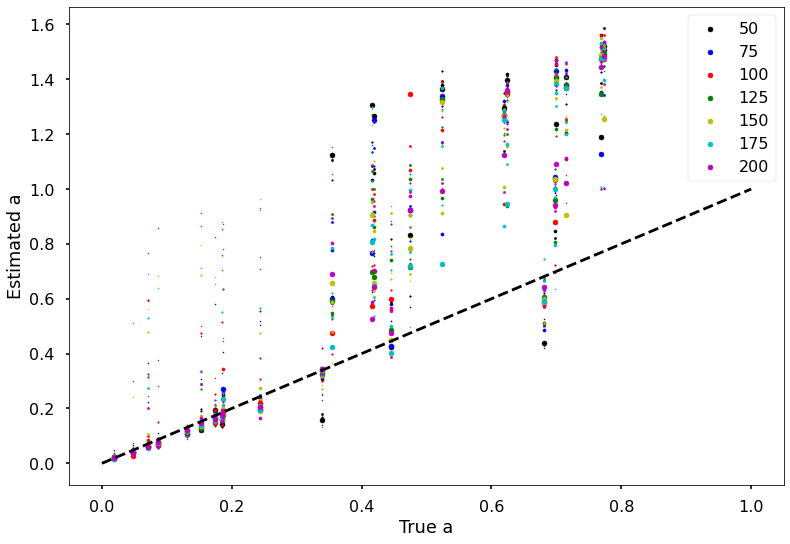

In [35]:
for i in range(7):
    for j in range(5):
        if j == 4:
            plt.scatter(a, learned_a[:,i,j,1], s = np.array(peaks[j]/100.), label = cells[i], c = c[i])
        else:
            plt.scatter(a, learned_a[:,i,j,1], s = np.array(peaks[j]/100.), c = c[i])
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('True a')
plt.ylabel('Estimated a')
#plt.ylim([0,2])
#plt.xlim([0,1.6])
plt.legend()
#plt.show()
plt.savefig('frontier-a-line.pdf')
#plt.show()

In [36]:
cells[i]/200.

1.0

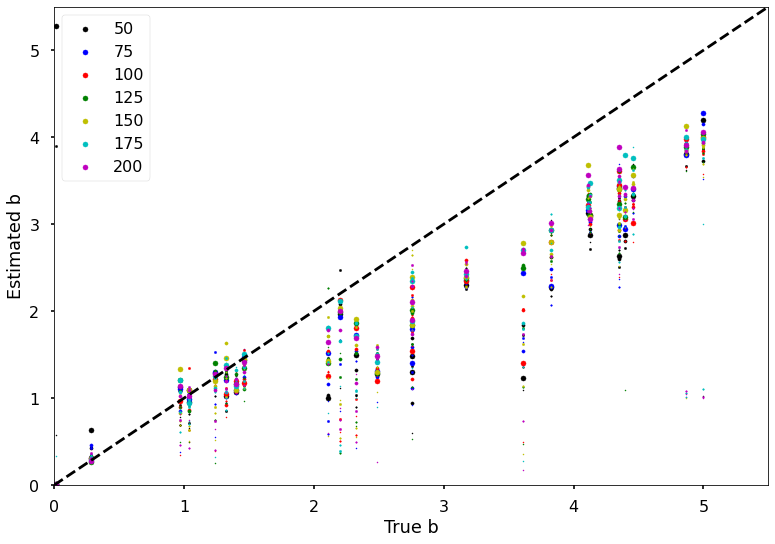

In [37]:
for i in range(7):
    for j in range(5):
        if j == 4:
            plt.scatter(b[mask], learned_b[mask,i,j,1], s = np.array(peaks[j]/100.), label = cells[i], c = c[i])
        else:
            plt.scatter(b[mask], learned_b[mask,i,j,1], s = np.array(peaks[j]/100.), c = c[i])
plt.plot([0,5.5],[0,5.5], 'k--')
plt.xlabel('True b')
plt.ylabel('Estimated b')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
plt.legend()
#plt.show()
plt.savefig('frontier-b-line.pdf')

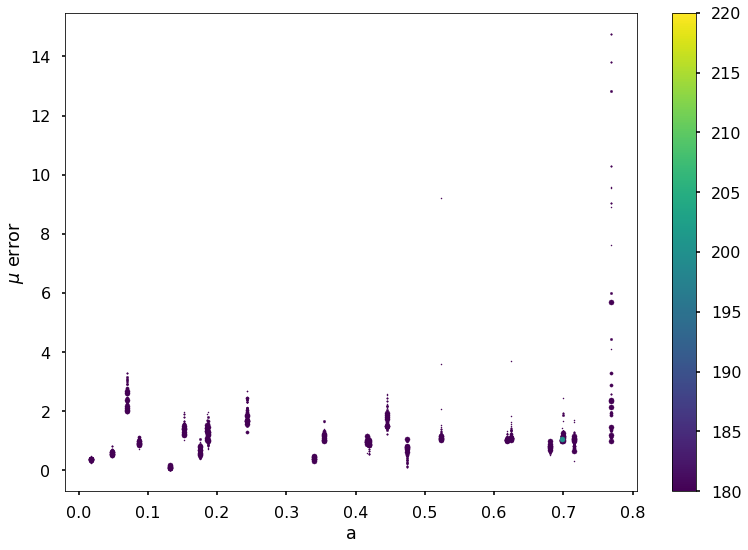

In [38]:
for i in range(nsims):
    for j in range(ncells):
        for k in range(npeaks):
            if a[i] < np.max(a):
                plt.scatter(a[i], learned_mu[i,j,k,1], 
                            s = peaks[k]/100., c = cells[j])
plt.xlabel('a')
plt.ylabel('$\mu$ error')
plt.colorbar()
plt.show()

In [39]:
over_cell_peaks = np.mean(np.mean(np.square(mu_err[:,:,:,1]), axis = 2), axis = 1)

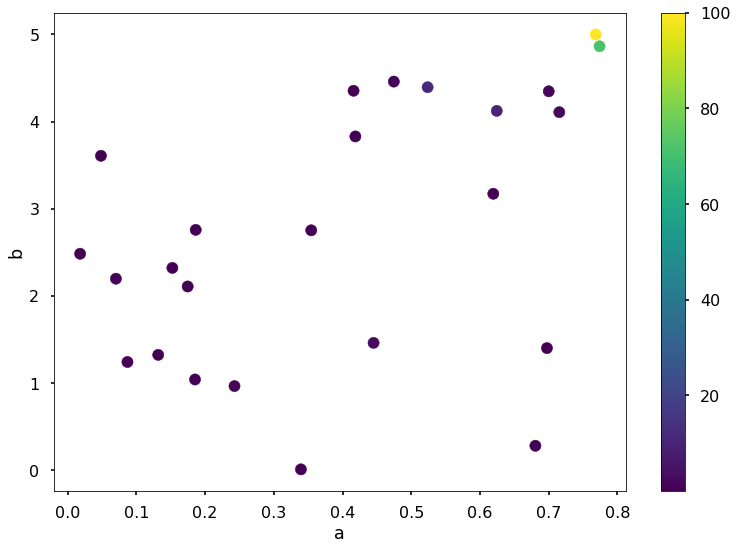

In [40]:
plt.scatter(a,b, c = 100 * np.divide(over_cell_peaks, np.max(over_cell_peaks)))
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar()
plt.show()

In [41]:
# testmask = np.unique(np.where(learned_mu[:,:,:,1] > 29)[0])

In [42]:
# plt.scatter(a[testmask],b[testmask])
# plt.xlabel('a')
# plt.ylabel('b')
# plt.colorbar()
# plt.show()

In [43]:
# control_mu = np.zeros((nsims,7,5))
# #dat = loadmat('/tigress/architv/drug-lfm/FINAL_EQ.mat')
# for i in range(nsims):
#     dat = np.load('learned-' + str(i+1) + '.npz', allow_pickle = True)
#     for j in range(7):
#         for k in range(5):
#             traces = dat['peaks'][j,k]
#             peaks = 0
#             for c in range(len(traces)):
#                 peaks += len(traces[c])
#             control_mu[i,j,k] = peaks/(np.max(np.hstack(traces)) * cells[j])

In [44]:
# control_mu_err = control_mu - np.expand_dims(mu, (1,2))

In [45]:
# np.mean(np.square(control_mu_err))

In [46]:
# from scipy.stats import ttest_rel

In [47]:
# ttest_rel(np.reshape(control_mu_err,-1), np.reshape(mu_err[:,:,:,0],-1))

In [48]:
# plt.scatter(np.reshape(mu_err[:,:,:,0],-1), np.reshape(control_mu_err,-1),  s = 10)
# plt.plot([-1,1],[-1,1],'k--')
# plt.show()


In [49]:
# np.sum(control_mu_err - mu_err[:,:,:,0] < 0)

In [50]:
cis = np.zeros((nsims, ncells, npeaks, 5))
for i in range(nsims):
    np.load('learned-' + str(i+1) + '.npz')
    cis[i] = dat['cis'][:,:,0,0,:]

In [51]:
np.mean(cis[:,:,0])

1.333282343781837

In [52]:
np.mean(cis[:,:,1])

0.6264993345677158

In [53]:
np.mean(cis[:,:,2])

0.38650710382687825

In [54]:
np.mean(cis[:,:,3])

0.2622374560736597

In [55]:
np.mean(cis[:,:,4])

0.1691092210355858

In [56]:
np.where(mu_err == np.max(mu_err))

(array([23, 23]), array([6, 6]), array([1, 1]), array([0, 1]))

In [57]:
mu_err.shape

(25, 7, 5, 2)

In [58]:
cis.shape

(25, 7, 5, 5)

In [59]:
cis.shape

(25, 7, 5, 5)

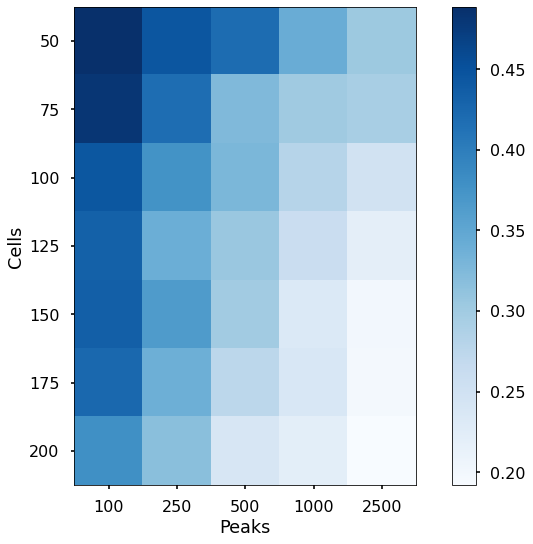

In [60]:
mu0 = np.nanmean(cis[mask,:,:,0], axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-ci-mu.pdf')
#plt.show()

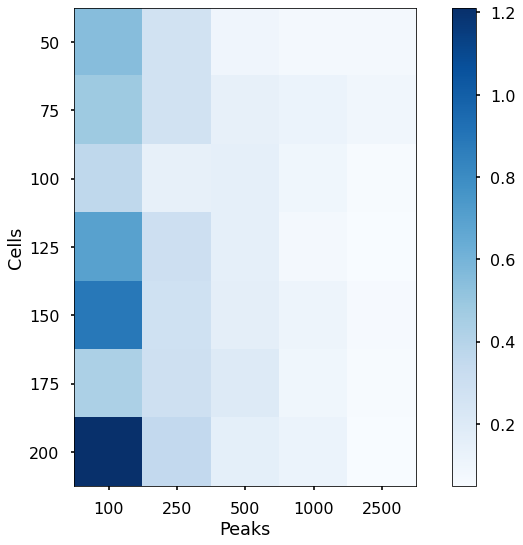

In [61]:
mu0 = np.nanmean(cis[mask,:,:,1], axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-ci-a.pdf')
#plt.show()

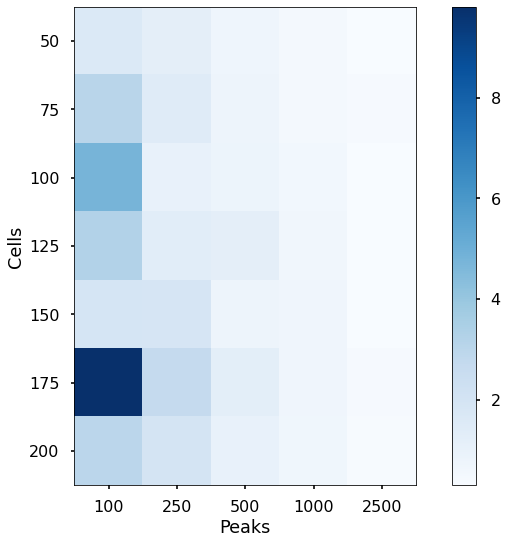

In [62]:
mu0 = np.nanmean(cis[mask,:,:,2], axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-ci-ajj.pdf')
#plt.show()

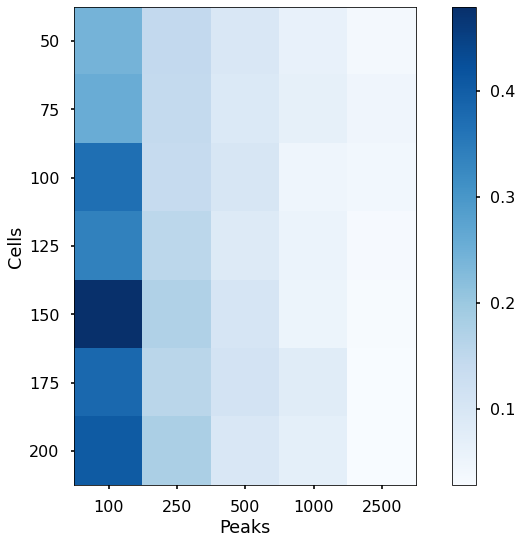

In [63]:
mu0 = np.nanmean(cis[mask,:,:,3], axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-ci-b.pdf')
#plt.show()

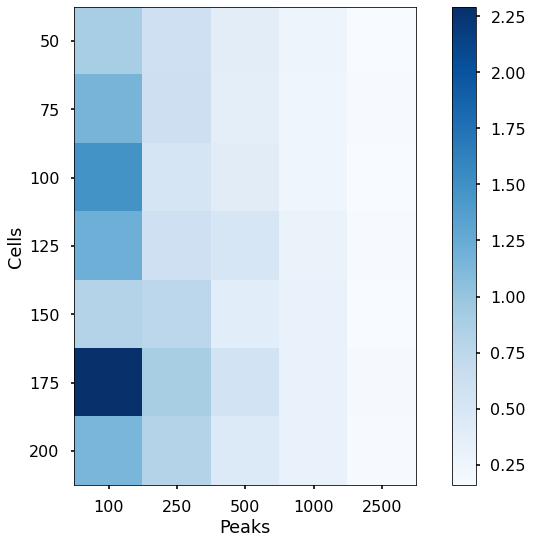

In [64]:
mu0 = np.nanmean(cis[mask,:,:,4], axis = 0)
fig, ax = plt.subplots()
im = ax.imshow(mu0, cmap = 'Blues')
ax.set_xticks(np.arange(mu0.shape[1]))
ax.set_yticks(np.arange(mu0.shape[0]))
ax.set_xticklabels(peaks)
ax.set_yticklabels(cells)
ax.set_xlabel('Peaks')
ax.set_ylabel('Cells')
cbar = ax.figure.colorbar(im, ax = ax)
plt.savefig('frontier-ci-bjj.pdf')
#plt.show()